In [44]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

Skipped data/03-22-2020.csv
Skipped data/03-21-2020.csv
Skipped data/03-20-2020.csv
Skipped data/03-19-2020.csv
Skipped data/03-18-2020.csv
Skipped data/03-17-2020.csv
Skipped data/03-16-2020.csv
Skipped data/03-15-2020.csv
Skipped data/03-14-2020.csv
Skipped data/03-13-2020.csv
Skipped data/03-12-2020.csv
Skipped data/03-11-2020.csv
Skipped data/03-10-2020.csv
Skipped data/03-09-2020.csv
Skipped data/03-08-2020.csv
Skipped data/03-07-2020.csv
Skipped data/03-06-2020.csv
Skipped data/03-05-2020.csv
Skipped data/03-04-2020.csv
Skipped data/03-03-2020.csv
Skipped data/03-02-2020.csv
Skipped data/03-01-2020.csv
Skipped data/02-29-2020.csv
Skipped data/02-28-2020.csv
Skipped data/02-27-2020.csv
Skipped data/02-26-2020.csv
Skipped data/02-25-2020.csv
Skipped data/02-24-2020.csv
Skipped data/02-23-2020.csv
Skipped data/02-22-2020.csv
Skipped data/02-21-2020.csv
Skipped data/02-20-2020.csv
Skipped data/02-19-2020.csv
Skipped data/02-18-2020.csv
Skipped data/02-17-2020.csv
Skipped data/02-16-2

In [35]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []

for file in data_files:
    daily_dataframe = pd.read_csv(file)
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.drop(["Longitude", "Latitude"], axis=1)

                                Confirmed  Deaths  Recovered
Last Update     Country/Region                              
1/22/2020 17:00 Mainland China      547.0    17.0       28.0
1/23/20 17:00   Mainland China      639.0    18.0       30.0
1/24/20 17:00   Mainland China      916.0    26.0       36.0
1/25/20 17:00   Mainland China     1399.0    42.0       39.0
1/26/20 16:00   Mainland China     2062.0    56.0       49.0
                         Confirmed         Deaths      Recovered
Country/Region      Mainland China Mainland China Mainland China
Last Update                                                     
1/22/2020 17:00              547.0           17.0           28.0
1/23/20 17:00                639.0           18.0           30.0
1/24/20 17:00                916.0           26.0           36.0
1/25/20 17:00               1399.0           42.0           39.0
1/26/20 16:00               2062.0           56.0           49.0
...                            ...            ...    

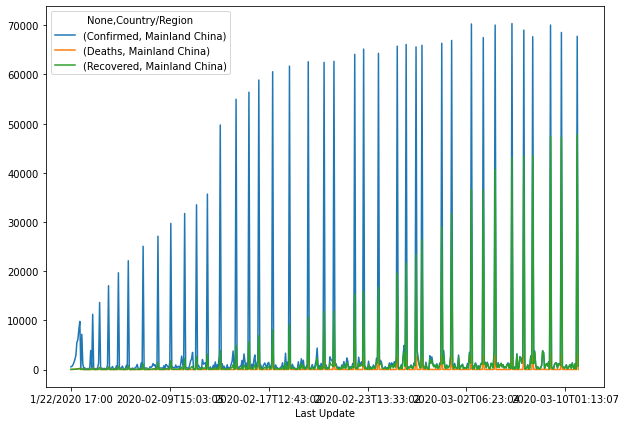

In [53]:
countries_selected = ["Mainland China"]
grouped_data = combined_data[combined_data["Country/Region"].isin(countries_selected)].groupby(by=["Last Update", "Country/Region"]).sum()
print(grouped_data.head())
fig, ax = plt.subplots(figsize=(10,7))
clean_data = grouped_data.unstack().replace(0, np.nan).dropna(axis=0)
print(clean_data)
clean_data.plot(kind="line", ax=ax)